<a href="https://www.kaggle.com/code/firmansevic/petroleum-trade?scriptVersionId=190102596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-crude-petroleum-trade-1995-2021/Global Crude Petroleum Trade 1995-2021.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Read Data Frame
df=pd.read_csv(r'/kaggle/input/global-crude-petroleum-trade-1995-2021/Global Crude Petroleum Trade 1995-2021.csv')
df.head(3)

,Continent,Country,Trade Value,Year,Action
0,Africa,Angola,2.767000e+10,2021,Export
1,Africa,Botswana,2.055000e+03,2021,Export
2,Africa,Cote d'Ivoire,4.447282e+08,2021,Export


In [4]:
# view unique data
df['Continent'].unique()
df['Year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995])

<Axes: >

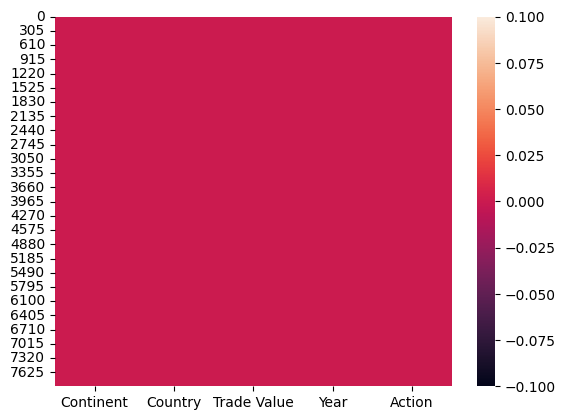

In [5]:
# Inspect if there is a missing data.
sns.heatmap(df.isnull())
# there is no missing data

In [6]:
# check data type, data frame size, columns name
df.head(2)
df.dtypes

Continent       object
Country         object
Trade Value    float64
Year             int64
Action          object
dtype: object

In [7]:
df.rename(columns={'Trade Value':'trade_value'},inplace=True)
df.head(2)

,Continent,Country,trade_value,Year,Action
0,Africa,Angola,2.767000e+10,2021,Export
1,Africa,Botswana,2.055000e+03,2021,Export


In [8]:
df[df.Action=='Export'].groupby('Country').trade_value.sum().sort_values(ascending=False).head(5)

Country
Saudi Arabia            3.378118e+12
Russia                  2.319029e+12
United Arab Emirates    1.187630e+12
Nigeria                 1.140277e+12
Canada                  1.066557e+12
Name: trade_value, dtype: float64

<Figure size 1500x500 with 0 Axes>

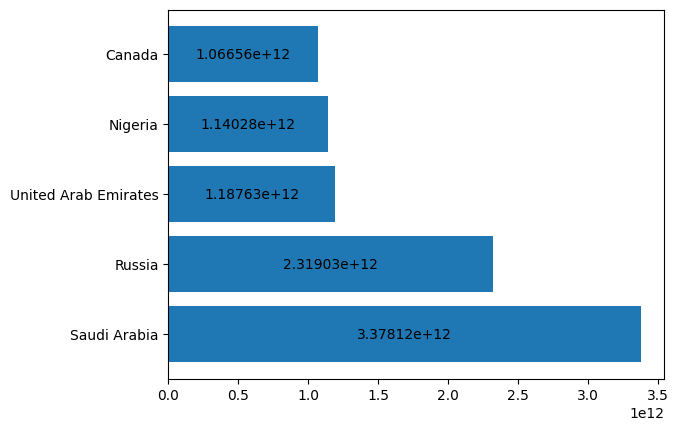

In [9]:
# looking at the 5 countries with the largest total exports
y=df[df.Action=='Export'].groupby('Country').trade_value.sum().sort_values(ascending=False).head(5)
x=df[df.Action=='Export'].groupby('Country').trade_value.sum().sort_values(ascending=False).head(5).index

fig=plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
g=ax.barh(x,y)
ax.bar_label(g, label_type="center") # This provides the labelling the bar. 
plt.show()

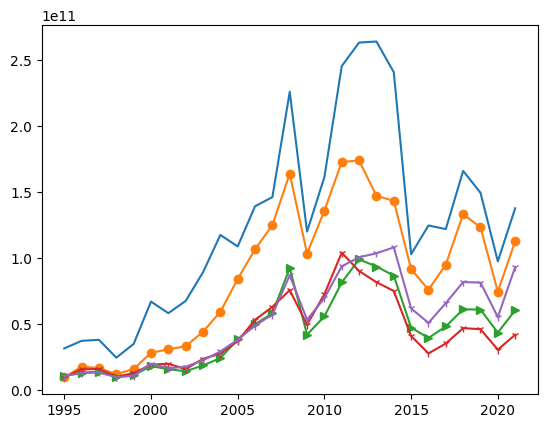

In [10]:
# fluctuations in export value from 1995-2021 in the 5 countries with the largest trade value
#is covid-19 affect the trade

x=df['Year'].drop_duplicates().sort_values()
y_sau=df[df['Country']=='Saudi Arabia'].groupby('Year').trade_value.sum()#.plot(kind='line')
y_rus=df[df['Country']=='Russia'].groupby('Year').trade_value.sum()#.plot(kind='line')
y_uae=df[df['Country']=='United Arab Emirates'].groupby('Year').trade_value.sum()#.plot(kind='line')
y_nig=df[df['Country']=='Nigeria'].groupby('Year').trade_value.sum()#.plot(kind='line')
y_can=df[df['Country']=='Canada'].groupby('Year').trade_value.sum()#.plot(kind='line')
#df.head(2)

chart=plt.subplot()
chart.plot(x,y_sau)
chart.plot(x,y_rus,marker='o')
chart.plot(x,y_uae,marker='>')
chart.plot(x,y_nig,marker='1')
chart.plot(x,y_can,marker='1')
#plt.legend(loc="upper right")
#plt.plot(y_sau, "-b", label="Saudi Arabia")
plt.show()


Action
Export    2.276301e+10
Import    3.421700e+10
Name: trade_value, dtype: float64


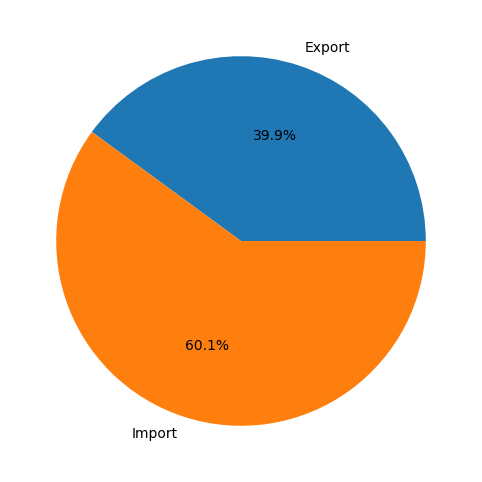

In [11]:
# Total Indonesian Crude-Petroleum trade from 2016-2021
a=df[(df['Country']=='Indonesia')&(df['Year']>2015)].groupby('Action').trade_value.sum()
print(a)

#plot grafik pie
act=['Export','Import']
val=df[(df['Country']=='Indonesia')&(df['Year']>2015)].groupby('Action').trade_value.sum()#.plot(kind='pie')
fig=plt.figure(figsize=(12,6))

plt.pie(val,labels=act,autopct='%1.1f%%')
plt.show()

#fig, ax = plt.subplots()
#ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [12]:
# 5 largest importing countries
df[df.Action=='Import'].groupby('Country').trade_value.sum().head(5).sort_values(ascending=False)


Country
Algeria        5.713415e+09
Andorra        2.742999e+08
Angola         2.060302e+08
Afghanistan    1.917553e+08
Albania        1.769550e+08
Name: trade_value, dtype: float64

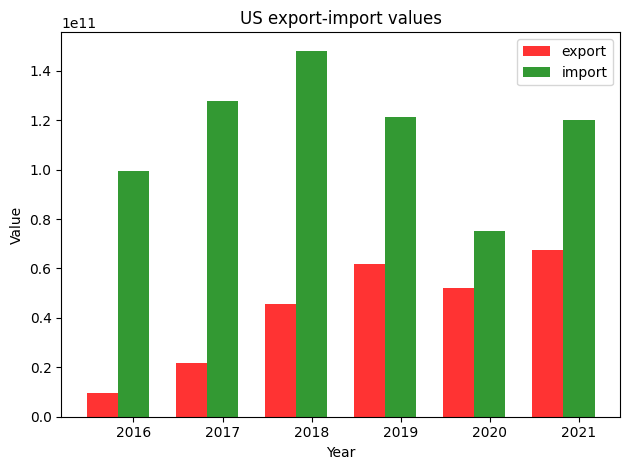

In [13]:
# American export-import value from 2016-2021
yea=df['Year'].drop_duplicates().sort_values(ascending=True).tail(6)
exp=df[(df.Country=='United States')&(df.Action=='Export')&(df.Year>2015)].groupby('Year').trade_value.sum()#.plot(kind='line')
imp=df[(df.Country=='United States')&(df.Action=='Import')&(df.Year>2015)].groupby('Year').trade_value.sum()#.plot(kind='line')
n_groups=6

fig, ax=plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, exp, bar_width,
alpha=opacity,
color='r',
label='export')

rects2 = plt.bar(index + bar_width, imp, bar_width,
alpha=opacity,
color='g',
label='import')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('US export-import values')
plt.xticks(index + bar_width, yea)
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
#df[(df.Country=='United States')&(df.Action=='Export')&(df.Year>2015)].groupby('Year').trade_value.sum()#.plot(kind='bar')
df[(df.Country=='United States')&(df.Action=='Import')&(df.Year>2015)].groupby('Year').trade_value.sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.SeriesGroupBy object at 0x79d661d1bac0>>